### Agenda
0. Basic Setup
1. Basic Plotting
2. Reading and Describing Data
3. Filters, Drop, Add Columns
4. Replacing, Casting, Histogram 
5. Barplot, Dropna

# Part 0
Basic Setup

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from collections import Counter

In [3]:
%matplotlib inline
plt.style.use('seaborn-poster')

# Part 1
Basic Plotting

In [4]:
accuracy = [0.15, 0.231, 0.44, 0.56, 0.7111, 0.8, 0.905]
iterations = list(range(1000, 8000, 1000))

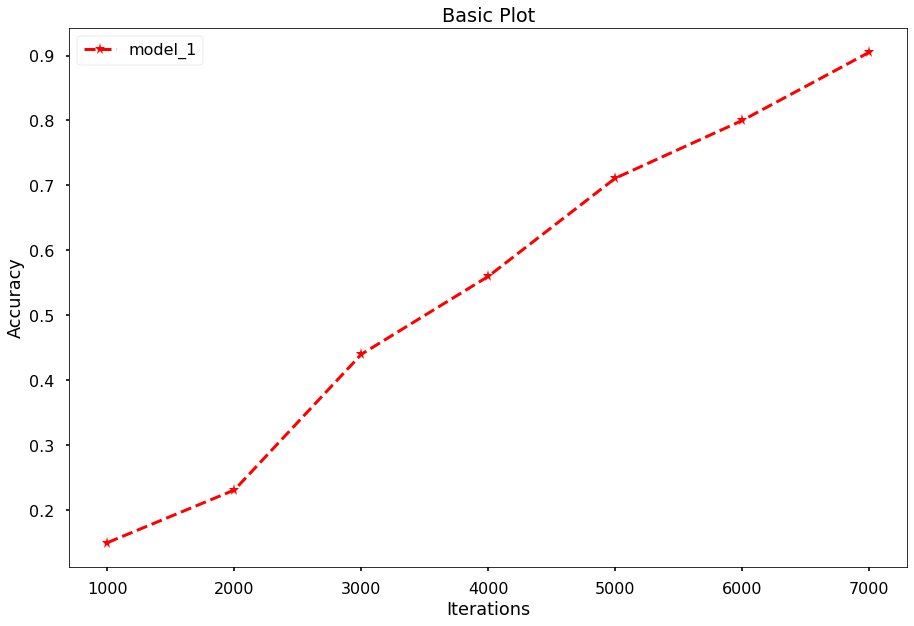

In [5]:
plt.plot(iterations, accuracy, color='red', linestyle='--', marker='*', linewidth=3, label='model_1')
# plt.plot(iterations, accuracy, '*--r', linewidth=3, label='model_1') 

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Basic Plot')
plt.legend()
plt.tight_layout()

plt.show()

# plt.savefig(basic_plot.png)

# Part 2
Reading, Describing and Acessing Data

In [6]:
main_df = pd.read_csv('data/so_survey_2021.csv')
main_df.head()

,ResponseId,Country,US_State,UK_Country,Age,YearsCode,EdLevel,DevType,LanguageHaveWorkedWith,CompTotal
0,1,Slovakia,NaN,NaN,25-34 years old,NaN,"Secondary school (e.g. American high school, G...","Developer, mobile",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,4800.0
1,2,Netherlands,NaN,NaN,18-24 years old,7,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,JavaScript;Python,NaN
2,3,Russian Federation,NaN,NaN,18-24 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Assembly;C;Python;R;Rust,NaN
3,4,Austria,NaN,NaN,35-44 years old,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, front-end",JavaScript;TypeScript,NaN
4,5,United Kingdom of Great Britain and Northern I...,NaN,England,25-34 years old,17,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, desktop or enterprise applications;...",Bash/Shell;HTML/CSS;Python;SQL,NaN


### Table Schema
Stack Overflow annual survey 2021  

__Country__ : Where do you live?   
__US_State__ : In which state or territory of the USA do you live?  
__UK_Country__ : In which part of the United Kingdom do you live?  
__Age__ : 	What is your age?  
__YearsCode__ : Including any education, how many years have you been coding in total?  
__EdLevel__ : Which of the following best describes the highest level of formal education that you’ve completed?  
__DevType__ : Which of the following describes your current job? Please select all that apply.  
__LanguageHaveWorkedWith__ : Which programming, scripting, and markup languages have you done extensive development work in over the past year?  
__CompTotal__ : What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in $? If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary.  

In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              83439 non-null  int64  
 1   Country                 83439 non-null  object 
 2   US_State                14920 non-null  object 
 3   UK_Country              4418 non-null   object 
 4   Age                     82407 non-null  object 
 5   YearsCode               81641 non-null  object 
 6   EdLevel                 83126 non-null  object 
 7   DevType                 66484 non-null  object 
 8   LanguageHaveWorkedWith  82357 non-null  object 
 9   CompTotal               47183 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 6.4+ MB


In [8]:
main_df.shape

(83439, 10)

In [9]:
main_df.describe(include='all')

,ResponseId,Country,US_State,UK_Country,Age,YearsCode,EdLevel,DevType,LanguageHaveWorkedWith,CompTotal
count,83439.000000,83439,14920,4418,82407,81641,83126,66484,82357,4.718300e+04
unique,NaN,181,55,4,8,52,9,8626,28690,NaN
top,NaN,United States of America,California,England,25-34 years old,5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",Python,NaN
freq,NaN,15288,2163,3915,32568,6190,35357,8601,1337,NaN
mean,41720.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.119407e+69
std,24086.908893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.603702e+71
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,20860.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+04
50%,41720.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.700000e+04
75%,62579.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000e+05


In [10]:
main_df.set_index('ResponseId')

,Country,US_State,UK_Country,Age,YearsCode,EdLevel,DevType,LanguageHaveWorkedWith,CompTotal
ResponseId,,,,,,,,,
1,Slovakia,NaN,NaN,25-34 years old,NaN,"Secondary school (e.g. American high school, G...","Developer, mobile",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,4800.0
2,Netherlands,NaN,NaN,18-24 years old,7,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,JavaScript;Python,NaN
3,Russian Federation,NaN,NaN,18-24 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Assembly;C;Python;R;Rust,NaN
4,Austria,NaN,NaN,35-44 years old,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, front-end",JavaScript;TypeScript,NaN
5,United Kingdom of Great Britain and Northern I...,NaN,England,25-34 years old,17,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, desktop or enterprise applications;...",Bash/Shell;HTML/CSS;Python;SQL,NaN
...,...,...,...,...,...,...,...,...,...
83435,United States of America,Texas,NaN,25-34 years old,6,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",Clojure;Kotlin;SQL,160500.0
83436,Benin,NaN,NaN,18-24 years old,4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",NaN,200000.0
83437,United States of America,New Jersey,NaN,25-34 years old,10,"Secondary school (e.g. American high school, G...",Data scientist or machine learning specialist;...,Groovy;Java;Python,1800.0


In [11]:
main_df.loc[4]

ResponseId                                                                5
Country                   United Kingdom of Great Britain and Northern I...
US_State                                                                NaN
UK_Country                                                          England
Age                                                         25-34 years old
YearsCode                                                                17
EdLevel                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
DevType                   Developer, desktop or enterprise applications;...
LanguageHaveWorkedWith                       Bash/Shell;HTML/CSS;Python;SQL
CompTotal                                                               NaN
Name: 4, dtype: object

In [12]:
main_df.loc[[14, 19]]

,ResponseId,Country,US_State,UK_Country,Age,YearsCode,EdLevel,DevType,LanguageHaveWorkedWith,CompTotal
14,15,United Kingdom of Great Britain and Northern I...,NaN,England,45-54 years old,40,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,JavaScript;SQL,NaN
19,20,Brazil,NaN,NaN,25-34 years old,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other (please specify):,C;C++;HTML/CSS;JavaScript;Matlab;Node.js;PHP;P...,NaN


In [13]:
main_df.loc[14:19]

,ResponseId,Country,US_State,UK_Country,Age,YearsCode,EdLevel,DevType,LanguageHaveWorkedWith,CompTotal
14,15,United Kingdom of Great Britain and Northern I...,NaN,England,45-54 years old,40,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,JavaScript;SQL,NaN
15,16,United States of America,Missouri,NaN,Under 18 years old,7,"Secondary school (e.g. American high school, G...",NaN,Bash/Shell;Python,NaN
16,17,Turkey,NaN,NaN,25-34 years old,6,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",C#;HTML/CSS;Java;JavaScript;Node.js,9000.0
17,18,Canada,NaN,NaN,25-34 years old,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end;Developer, full-stack;Dev...",Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL,61000.0
18,19,Singapore,NaN,NaN,45-54 years old,40,"Other doctoral degree (Ph.D., Ed.D., etc.)",NaN,C++;Python,18700.0
19,20,Brazil,NaN,NaN,25-34 years old,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other (please specify):,C;C++;HTML/CSS;JavaScript;Matlab;Node.js;PHP;P...,NaN


In [14]:
main_df.loc[14:19, 'Age']

14       45-54 years old
15    Under 18 years old
16       25-34 years old
17       25-34 years old
18       45-54 years old
19       25-34 years old
Name: Age, dtype: object

In [15]:
main_df.columns

Index(['ResponseId', 'Country', 'US_State', 'UK_Country', 'Age', 'YearsCode',
       'EdLevel', 'DevType', 'LanguageHaveWorkedWith', 'CompTotal'],
      dtype='object')

In [16]:
main_df.set_index(['Country', 'EdLevel'], inplace=True)

In [17]:
main_df.loc['Canada']

,ResponseId,US_State,UK_Country,Age,YearsCode,DevType,LanguageHaveWorkedWith,CompTotal
EdLevel,,,,,,,,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,NaN,NaN,25-34 years old,9,"Developer, front-end;Developer, full-stack;Dev...",Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL,61000.0
Some college/university study without earning a degree,68,NaN,NaN,35-44 years old,25,"Developer, desktop or enterprise applications;...",C#;VBA,95000.0
"Other doctoral degree (Ph.D., Ed.D., etc.)",78,NaN,NaN,35-44 years old,10,Data scientist or machine learning specialist,HTML/CSS;Python;R,200000.0
Something else,87,NaN,NaN,35-44 years old,31,"Developer, back-end",C#;SQL;TypeScript,126000.0
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",90,NaN,NaN,18-24 years old,9,NaN,C;C++;Java;JavaScript;Node.js;Python;R,NaN
...,...,...,...,...,...,...,...,...
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",83283,NaN,NaN,18-24 years old,5,"Developer, back-end",Java;JavaScript;Node.js;Python;Ruby;SQL;TypeSc...,84000.0
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",83386,NaN,NaN,25-34 years old,2,Database administrator;Data or business analyst,Python;SQL,84000.0
Some college/university study without earning a degree,83388,NaN,NaN,45-54 years old,40,"Developer, front-end;Developer, desktop or ent...",Bash/Shell;Go;HTML/CSS;JavaScript;Node.js;Perl...,250000.0


In [18]:
main_df.loc['Canada', 'Something else']

/tmp/ipykernel_3509/2638765440.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  main_df.loc['Canada', 'Something else']


ResponseId US_State UK_Country                 Age  \
Country EdLevel                                                              
Canada  Something else          87      NaN        NaN     35-44 years old   
        Something else         285      NaN        NaN   Prefer not to say   
        Something else        2452      NaN        NaN   Prefer not to say   
        Something else        4115      NaN        NaN     18-24 years old   
        Something else        4223      NaN        NaN     25-34 years old   
...                            ...      ...        ...                 ...   
        Something else       81416      NaN        NaN     35-44 years old   
        Something else       81436      NaN        NaN     25-34 years old   
        Something else       81482      NaN        NaN     18-24 years old   
        Something else       81544      NaN        NaN  Under 18 years old   
        Something else       81944      NaN        NaN     18-24 years old   

                       YearsCode  \
Country EdLevel                    
Canada  Something else        31   
        Something else         8   
        Something else         4   
        Something else         5   
        Something else        11   
...                          ...   
        Something else        21   
        Something else         9   
        Something else         7   
        Something else         2   
        Something else         8   

                                                                  DevType  \
Country EdLevel                                                             
Canada  Something else                                Developer, back-end   
        Something else                                                NaN   
        Something else                                                NaN   
        Something else                                                NaN   
        Something else  Developer, back-end;Database administrator;Sys...   
...                                                                   ...   
        Something else  Developer, front-end;Developer, full-stack;Dev...   
        Something else  Developer, full-stack;Developer, QA or test;Da...   
        Something else         Developer, full-stack;System administrator   
        Something else                                                NaN   
        Something else  Developer, front-end;Developer, desktop or ent...   

                                                   LanguageHaveWorkedWith  \
Country EdLevel                                                             
Canada  Something else                                  C#;SQL;TypeScript   
        Something else                         HTML/CSS;JavaScript;Python   
        Something else                    HTML/CSS;Java;JavaScript;Python   
        Something else  HTML/CSS;JavaScript;Julia;Kotlin;Node.js;Pytho...   
        Something else                          Bash/Shell;PowerShell;SQL   
...                                                                   ...   
        Something else  Bash/Shell;HTML/CSS;JavaScript;Node.js;PowerSh...   
        Something else  C#;HTML/CSS;JavaScript;Node.js;PowerShell;Pyth...   
        Something else             Bash/Shell;HTML/CSS;PHP;PowerShell;SQL   
        Something else                                  JavaScript;Python   
        Something else  Bash/Shell;HTML/CSS;Java;JavaScript;Kotlin;Nod...   

                        CompTotal  
Country EdLevel                    
Canada  Something else   126000.0  
        Something else        NaN  
        Something else        NaN  
        Something else        NaN  
        Something else    86000.0  
...                           ...  
        Something else    90000.0  
        Something else    70000.0  
        Something else      545.0  
        Something else        NaN  
        Something else    70000.0  

[104 rows x 8 columns]

In [19]:
main_df.reset_index()

,Country,EdLevel,ResponseId,US_State,UK_Country,Age,YearsCode,DevType,LanguageHaveWorkedWith,CompTotal
0,Slovakia,"Secondary school (e.g. American high school, G...",1,NaN,NaN,25-34 years old,NaN,"Developer, mobile",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,4800.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,NaN,NaN,18-24 years old,7,NaN,JavaScript;Python,NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,NaN,NaN,18-24 years old,NaN,NaN,Assembly;C;Python;R;Rust,NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN,35-44 years old,NaN,"Developer, front-end",JavaScript;TypeScript,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,NaN,England,25-34 years old,17,"Developer, desktop or enterprise applications;...",Bash/Shell;HTML/CSS;Python;SQL,NaN
...,...,...,...,...,...,...,...,...,...,...
83434,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",83435,Texas,NaN,25-34 years old,6,"Developer, back-end",Clojure;Kotlin;SQL,160500.0
83435,Benin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",83436,NaN,NaN,18-24 years old,4,"Developer, full-stack",NaN,200000.0
83436,United States of America,"Secondary school (e.g. American high school, G...",83437,New Jersey,NaN,25-34 years old,10,Data scientist or machine learning specialist;...,Groovy;Java;Python,1800.0
83437,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",83438,NaN,NaN,25-34 years old,5,"Developer, back-end",Bash/Shell;JavaScript;Node.js;Python,90000.0


In [20]:
main_df.set_index('ResponseId', inplace=True)

# Part 3
Filters, Drop, Add Columns

In [21]:
main_df.drop(columns=['US_State', 'UK_Country'])   # inplace=True

,Age,YearsCode,DevType,LanguageHaveWorkedWith,CompTotal
ResponseId,,,,,
1,25-34 years old,NaN,"Developer, mobile",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,4800.0
2,18-24 years old,7,NaN,JavaScript;Python,NaN
3,18-24 years old,NaN,NaN,Assembly;C;Python;R;Rust,NaN
4,35-44 years old,NaN,"Developer, front-end",JavaScript;TypeScript,NaN
5,25-34 years old,17,"Developer, desktop or enterprise applications;...",Bash/Shell;HTML/CSS;Python;SQL,NaN
...,...,...,...,...,...
83435,25-34 years old,6,"Developer, back-end",Clojure;Kotlin;SQL,160500.0
83436,18-24 years old,4,"Developer, full-stack",NaN,200000.0
83437,25-34 years old,10,Data scientist or machine learning specialist;...,Groovy;Java;Python,1800.0


In [22]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83439 entries, 1 to 83439
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   US_State                14920 non-null  object 
 1   UK_Country              4418 non-null   object 
 2   Age                     82407 non-null  object 
 3   YearsCode               81641 non-null  object 
 4   DevType                 66484 non-null  object 
 5   LanguageHaveWorkedWith  82357 non-null  object 
 6   CompTotal               47183 non-null  float64
dtypes: float64(1), object(6)
memory usage: 5.1+ MB


In [23]:
main_df.drop(main_df.index[0:100])   # inplace=True

,US_State,UK_Country,Age,YearsCode,DevType,LanguageHaveWorkedWith,CompTotal
ResponseId,,,,,,,
101,NaN,NaN,18-24 years old,8,"Developer, mobile;Developer, front-end;Develop...",Dart;JavaScript;Node.js,1.400000e+05
102,NaN,NaN,25-34 years old,18,"Developer, desktop or enterprise applications;...",C#;HTML/CSS;JavaScript;PHP,1.900000e+03
103,NaN,NaN,18-24 years old,4,"Developer, back-end;Student",Python,1.000000e+05
104,California,NaN,25-34 years old,10,Scientist;Engineering manager,C++;Go;Python;TypeScript,1.000000e+29
105,NaN,NaN,25-34 years old,4,"Developer, front-end;Developer, full-stack;Dev...",HTML/CSS;JavaScript;PHP;SQL,NaN
...,...,...,...,...,...,...,...
83435,Texas,NaN,25-34 years old,6,"Developer, back-end",Clojure;Kotlin;SQL,1.605000e+05
83436,NaN,NaN,18-24 years old,4,"Developer, full-stack",NaN,2.000000e+05
83437,New Jersey,NaN,25-34 years old,10,Data scientist or machine learning specialist;...,Groovy;Java;Python,1.800000e+03


In [44]:
filt = main_df['DevType'].str.contains('machine learning|data scientist', na=False, case=False)
main_df['DataScienceOrML'] = np.where(filt, True, False)
main_df

,US_State,UK_Country,Age,YearsCode,DevType,LanguageHaveWorkedWith,CompTotal,DataScienceOrML
ResponseId,,,,,,,,
1,NaN,NaN,25-34 years old,NaN,"Developer, mobile",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,4800.0,False
2,NaN,NaN,18-24 years old,7.0,NaN,JavaScript;Python,NaN,False
3,NaN,NaN,18-24 years old,NaN,NaN,Assembly;C;Python;R;Rust,NaN,False
4,NaN,NaN,35-44 years old,NaN,"Developer, front-end",JavaScript;TypeScript,NaN,False
5,NaN,England,25-34 years old,17.0,"Developer, desktop or enterprise applications;...",Bash/Shell;HTML/CSS;Python;SQL,NaN,False
...,...,...,...,...,...,...,...,...
83435,Texas,NaN,25-34 years old,6.0,"Developer, back-end",Clojure;Kotlin;SQL,160500.0,False
83436,NaN,NaN,18-24 years old,4.0,"Developer, full-stack",NaN,200000.0,False
83437,New Jersey,NaN,25-34 years old,10.0,Data scientist or machine learning specialist;...,Groovy;Java;Python,1800.0,True


In [25]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83439 entries, 1 to 83439
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   US_State                14920 non-null  object 
 1   UK_Country              4418 non-null   object 
 2   Age                     82407 non-null  object 
 3   YearsCode               81641 non-null  object 
 4   DevType                 66484 non-null  object 
 5   LanguageHaveWorkedWith  82357 non-null  object 
 6   CompTotal               47183 non-null  float64
 7   DataScienceOrML         83439 non-null  bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 7.2+ MB


In [26]:
main_df['DataScienceOrML'].value_counts()

False    79166
True      4273
Name: DataScienceOrML, dtype: int64

# Part 4
Replacing, Casting, Histogram 

In [27]:
x = [0, 1, 1.9999, 3, 3.5, 4]

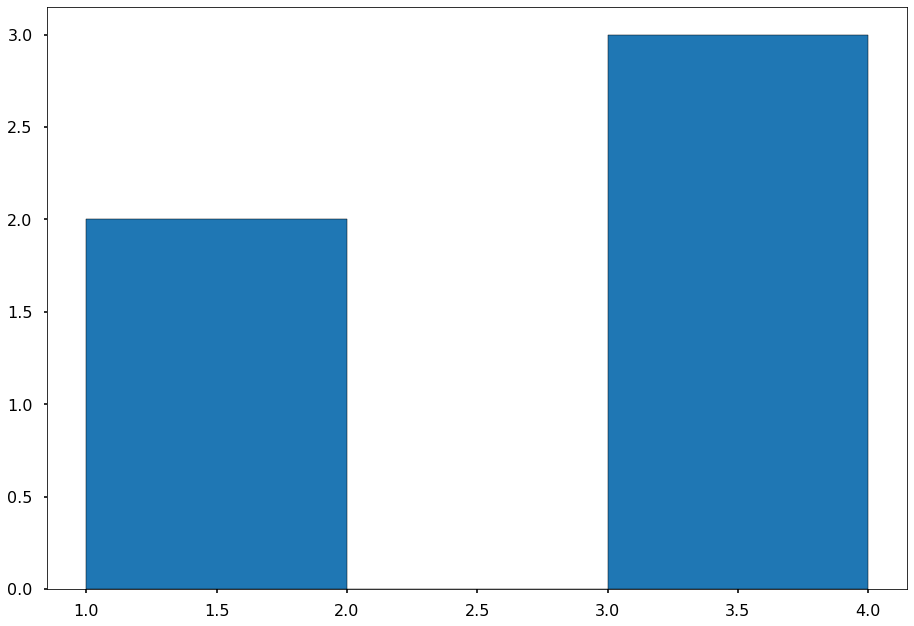

In [28]:
plt.hist(x, bins=[1, 2, 3, 4], edgecolor='black')

plt.tight_layout()

plt.show()

### How does it work?

```
plt.hist(x=some_data, bins=[1, 2, 3, 4])
```

1st bin: [1, 2)  
2nd bin: [2, 3)  
3rd bin: [3, 4]

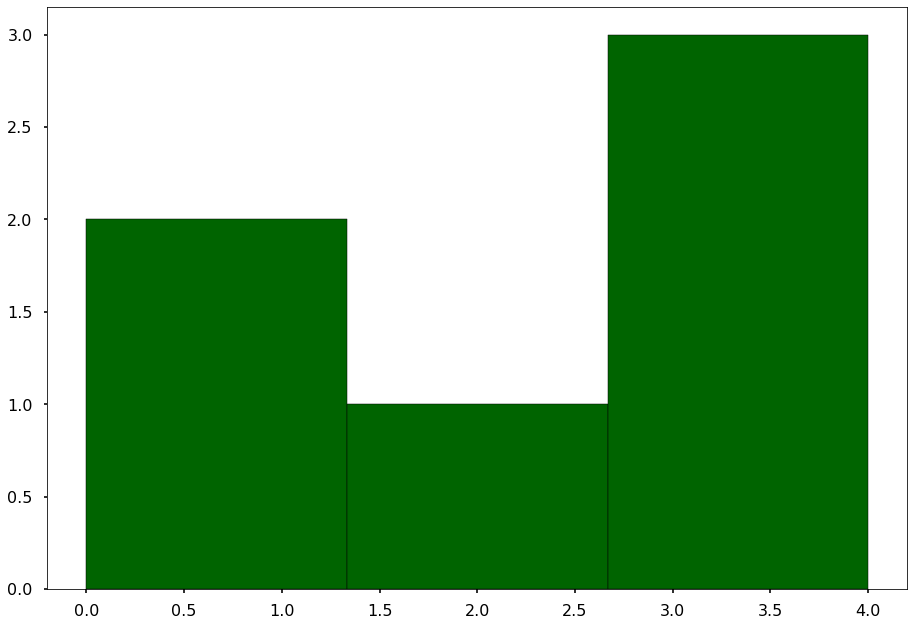

In [29]:
plt.hist(x, bins=3, edgecolor='black', color='darkgreen')

plt.tight_layout()

plt.show()

In [43]:
main_df['YearsCode'].value_counts()

5.0     6190
10.0    6067
6.0     5565
4.0     5049
7.0     4940
8.0     4714
3.0     4449
15.0    3625
20.0    3419
2.0     3342
12.0    3188
9.0     3009
11.0    2344
13.0    2016
25.0    1984
14.0    1813
1.0     1695
30.0    1660
16.0    1491
0.0     1489
18.0    1386
17.0    1331
35.0    1007
22.0     941
21.0     863
40.0     830
23.0     811
19.0     659
24.0     639
26.0     533
27.0     492
28.0     455
38.0     361
32.0     331
37.0     329
33.0     309
34.0     268
36.0     264
31.0     219
39.0     205
42.0     203
29.0     197
41.0     179
51.0     170
45.0     156
43.0     124
44.0      90
46.0      67
50.0      58
47.0      52
48.0      33
49.0      30
Name: YearsCode, dtype: int64

In [31]:
main_df['YearsCode'].replace('Less than 1 year', 0, inplace=True)
main_df['YearsCode'].replace('More than 50 years', 51, inplace=True)
main_df['YearsCode'] = main_df['YearsCode'].astype(float)

In [32]:
main_df['YearsCode'].describe()

count    81641.000000
mean        12.338200
std          9.833144
min          0.000000
25%          5.000000
50%         10.000000
75%         17.000000
max         51.000000
Name: YearsCode, dtype: float64

In [33]:
main_df['YearsCode'].median()

10.0

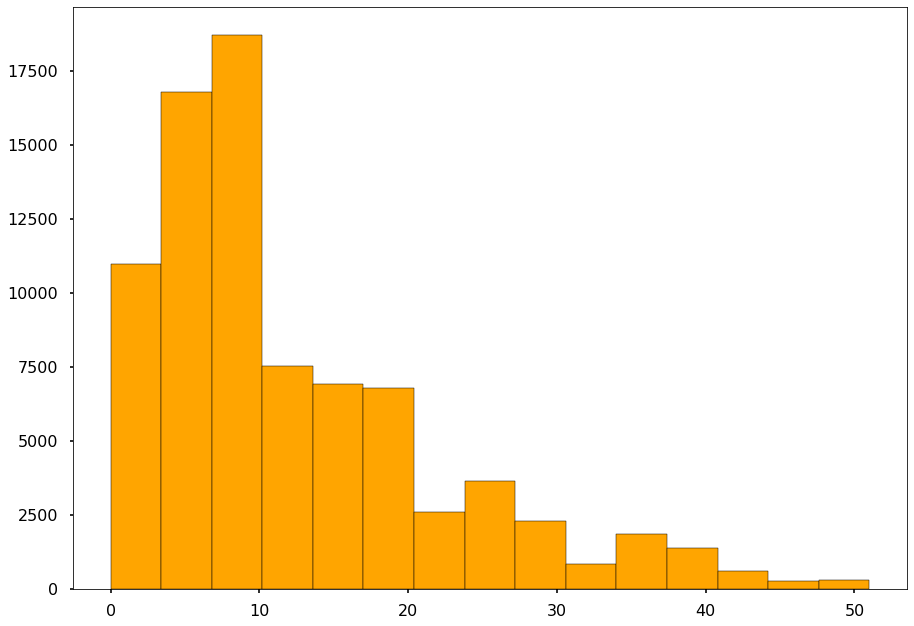

In [34]:
plt.hist(main_df['YearsCode'], bins=15, edgecolor='black', color='orange')

plt.tight_layout()

plt.show()

In [35]:
bins = list(range(0, 53, 2))

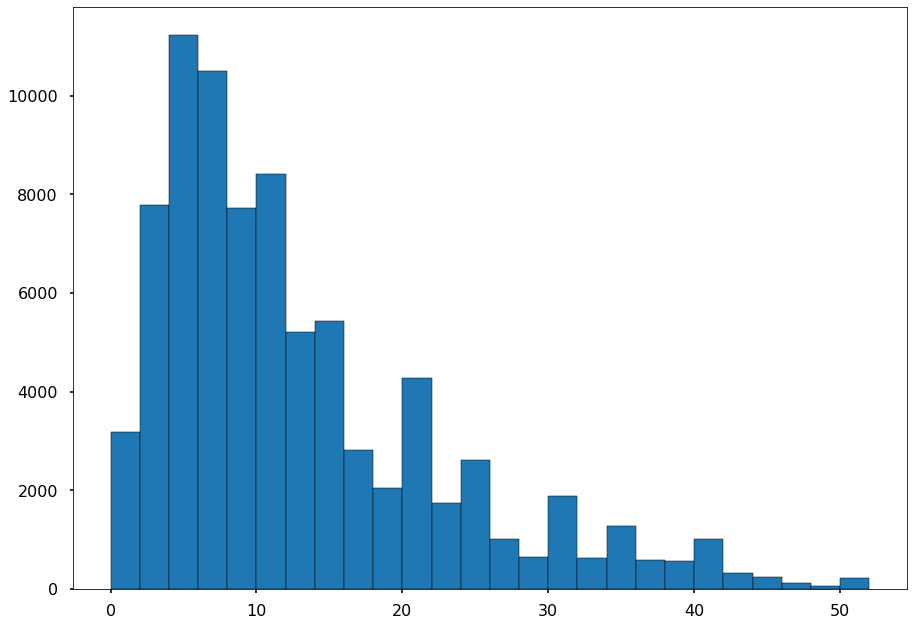

In [36]:
plt.hist(main_df['YearsCode'], bins=bins, edgecolor='black')

plt.tight_layout()

plt.show()

# Part 5
Barplot, Dropna

In [37]:
main_df.columns.tolist()

['US_State',
 'UK_Country',
 'Age',
 'YearsCode',
 'DevType',
 'LanguageHaveWorkedWith',
 'CompTotal',
 'DataScienceOrML']

In [38]:
# ids = main_df['ResponseId']
ids = main_df.index
langs = main_df['LanguageHaveWorkedWith']   # .dropna()
language_counter = Counter()

In [39]:
for response in langs:
    language_counter.update(response.split(';'))

AttributeError: 'float' object has no attribute 'split'

In [ ]:
languages, popularity = map(list, zip(*language_counter.most_common(10)))

In [ ]:
plt.bar(languages, popularity, color='darkgreen')

plt.xticks(rotation=45)
plt.ylabel('Number of People Who Use')
plt.title('Most Popular Languages')

plt.show()